In [ ]:
pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("cirrhosis.csv")

In [ ]:
df1

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [ ]:
df2

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [ ]:
df2.rename(columns={'ID': 'id'}, inplace=True)

In [ ]:
df = df1.append(df2)

<ipython-input-7-68017848d1f5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [ ]:
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
414,415,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
415,416,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
416,417,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
414,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
415,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
416,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8318,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
8319,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
8320,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
8321,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [ ]:
df.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

In [ ]:
#Defining a selective outlier capping approach so as to not remove data which could indicate valuable insights during model training and not change the distribution too much
# Upper limits set based on the distribution of the scatter plots above(Only extereme values removed and capped)
df_C = df[df['Status'] =='C']
df_CL = df[df['Status'] =='CL']
df_D = df[df['Status'] =='D']

df['Bilirubin'].iloc[(df_CL[df_CL['Bilirubin'] > 8.7].index)] = 8.7
df['Bilirubin'].iloc[(df_C[df_C['Bilirubin'] > 14.5].index)] = 14.5
df['Bilirubin'].iloc[(df_D[df_D['Bilirubin'] > 14.6].index)] = 14.6

df['Cholesterol'].iloc[(df_CL[df_CL['Cholesterol'] > 750].index)] = 750

df['SGOT'].iloc[(df_C[df_C['SGOT'] > 328.6].index)] = 328.6
df['SGOT'].iloc[(df_D[df_D['SGOT'] > 338].index)] = 338

df['Tryglicerides'].iloc[(df_C[df_C['Tryglicerides'] > 432].index)] = 432
df['Tryglicerides'].iloc[(df_D[df_D['Tryglicerides'] > 432].index)] = 432

df['Platelets'].iloc[(df_D[df_D['Platelets'] > 600].index)] = 563

df['Prothrombin'].iloc[(df_C[df_C['Prothrombin'] > 13.6].index)] = 13.6
df['Prothrombin'].iloc[(df_D[df_D['Prothrombin'] > 14.1].index)] = 14.1

<ipython-input-14-e724ad22b352>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bilirubin'].iloc[(df_CL[df_CL['Bilirubin'] > 8.7].index)] = 8.7
<ipython-input-14-e724ad22b352>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bilirubin'].iloc[(df_C[df_C['Bilirubin'] > 14.5].index)] = 14.5
<ipython-input-14-e724ad22b352>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bilirubin'].iloc[(df_D[df_D['Bilirubin'] > 14.6].index)]

In [ ]:
df.isna().sum()

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64

In [ ]:
df.dropna(axis=0, how='any', inplace=True)
df.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [ ]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,1153,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0,C
8213,994,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,C
8214,939,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,C
8215,839,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,C


In [ ]:
df_test = pd.read_csv("test.csv")
test_IDs = df_test.id
df_test = df_test.drop("id", axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
drug_le = LabelEncoder().fit(df['Drug'])
df['Drug'] = drug_le.transform(df['Drug'])
df_test['Drug'] = drug_le.transform(df_test['Drug'])

sex_le = LabelEncoder().fit(df['Sex'])
df['Sex'] = sex_le.transform(df['Sex'])
df_test['Sex'] = sex_le.transform(df_test['Sex'])

ascites_le = LabelEncoder().fit(df['Ascites'])
df['Ascites'] = ascites_le.transform(df['Ascites'])
df_test['Ascites'] = ascites_le.transform(df_test['Ascites'])

hepatomegaly_le = LabelEncoder().fit(df['Hepatomegaly'])
df['Hepatomegaly'] = hepatomegaly_le.transform(df['Hepatomegaly'])
df_test['Hepatomegaly'] = hepatomegaly_le.transform(df_test['Hepatomegaly'])

spiders_le = LabelEncoder().fit(df['Spiders'])
df['Spiders'] = spiders_le.transform(df['Spiders'])
df_test['Spiders'] = spiders_le.transform(df_test['Spiders'])

df_edema_encoded =  pd.get_dummies(df['Edema'],prefix = 'Edema_Presence', columns =['Edema'])
df = pd.concat([df, df_edema_encoded], axis=1)
df = df.drop(['Edema'], axis=1)

df_test_edema_encoded = pd.get_dummies(df_test['Edema'],prefix = 'Edema_Presence', columns =['Edema'])
df_test = pd.concat([df_test, df_test_edema_encoded], axis=1)
df_test = df_test.drop(['Edema'], axis=1)

status_le = LabelEncoder().fit(df['Status'])
df['Status'] = status_le.transform(df['Status'])

In [ ]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Edema_Presence_N,Edema_Presence_S,Edema_Presence_Y
0,999,0,21532,1,0,0,0,2.3,316.0,3.35,...,1601.0,179.80,63.0,394.0,9.7,3.0,2,1,0,0
1,2574,1,19237,0,0,0,0,0.9,364.0,3.54,...,1440.0,134.85,88.0,361.0,11.0,3.0,0,1,0,0
2,3428,1,13727,0,0,1,1,3.3,299.0,3.55,...,1029.0,119.35,50.0,199.0,11.7,4.0,2,0,0,1
3,2576,1,18460,0,0,0,0,0.6,256.0,3.50,...,1653.0,71.30,96.0,269.0,10.7,3.0,0,1,0,0
4,788,1,16658,0,0,1,0,1.1,346.0,3.65,...,1181.0,125.55,96.0,298.0,10.6,4.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,1153,0,22347,0,0,1,0,0.4,246.0,3.58,...,797.0,91.00,113.0,288.0,10.4,2.0,0,1,0,0
8213,994,1,21294,0,0,0,0,0.4,260.0,2.75,...,1166.0,70.00,82.0,231.0,10.8,2.0,0,1,0,0
8214,939,0,22767,0,0,0,0,1.7,434.0,3.35,...,1713.0,171.00,100.0,234.0,10.2,2.0,0,1,0,0
8215,839,0,13879,0,0,0,0,2.0,247.0,3.16,...,1050.0,117.00,88.0,335.0,10.5,2.0,0,1,0,0


In [ ]:
df['Status'].value_counts()

0    5112
2    2776
1     293
Name: Status, dtype: int64

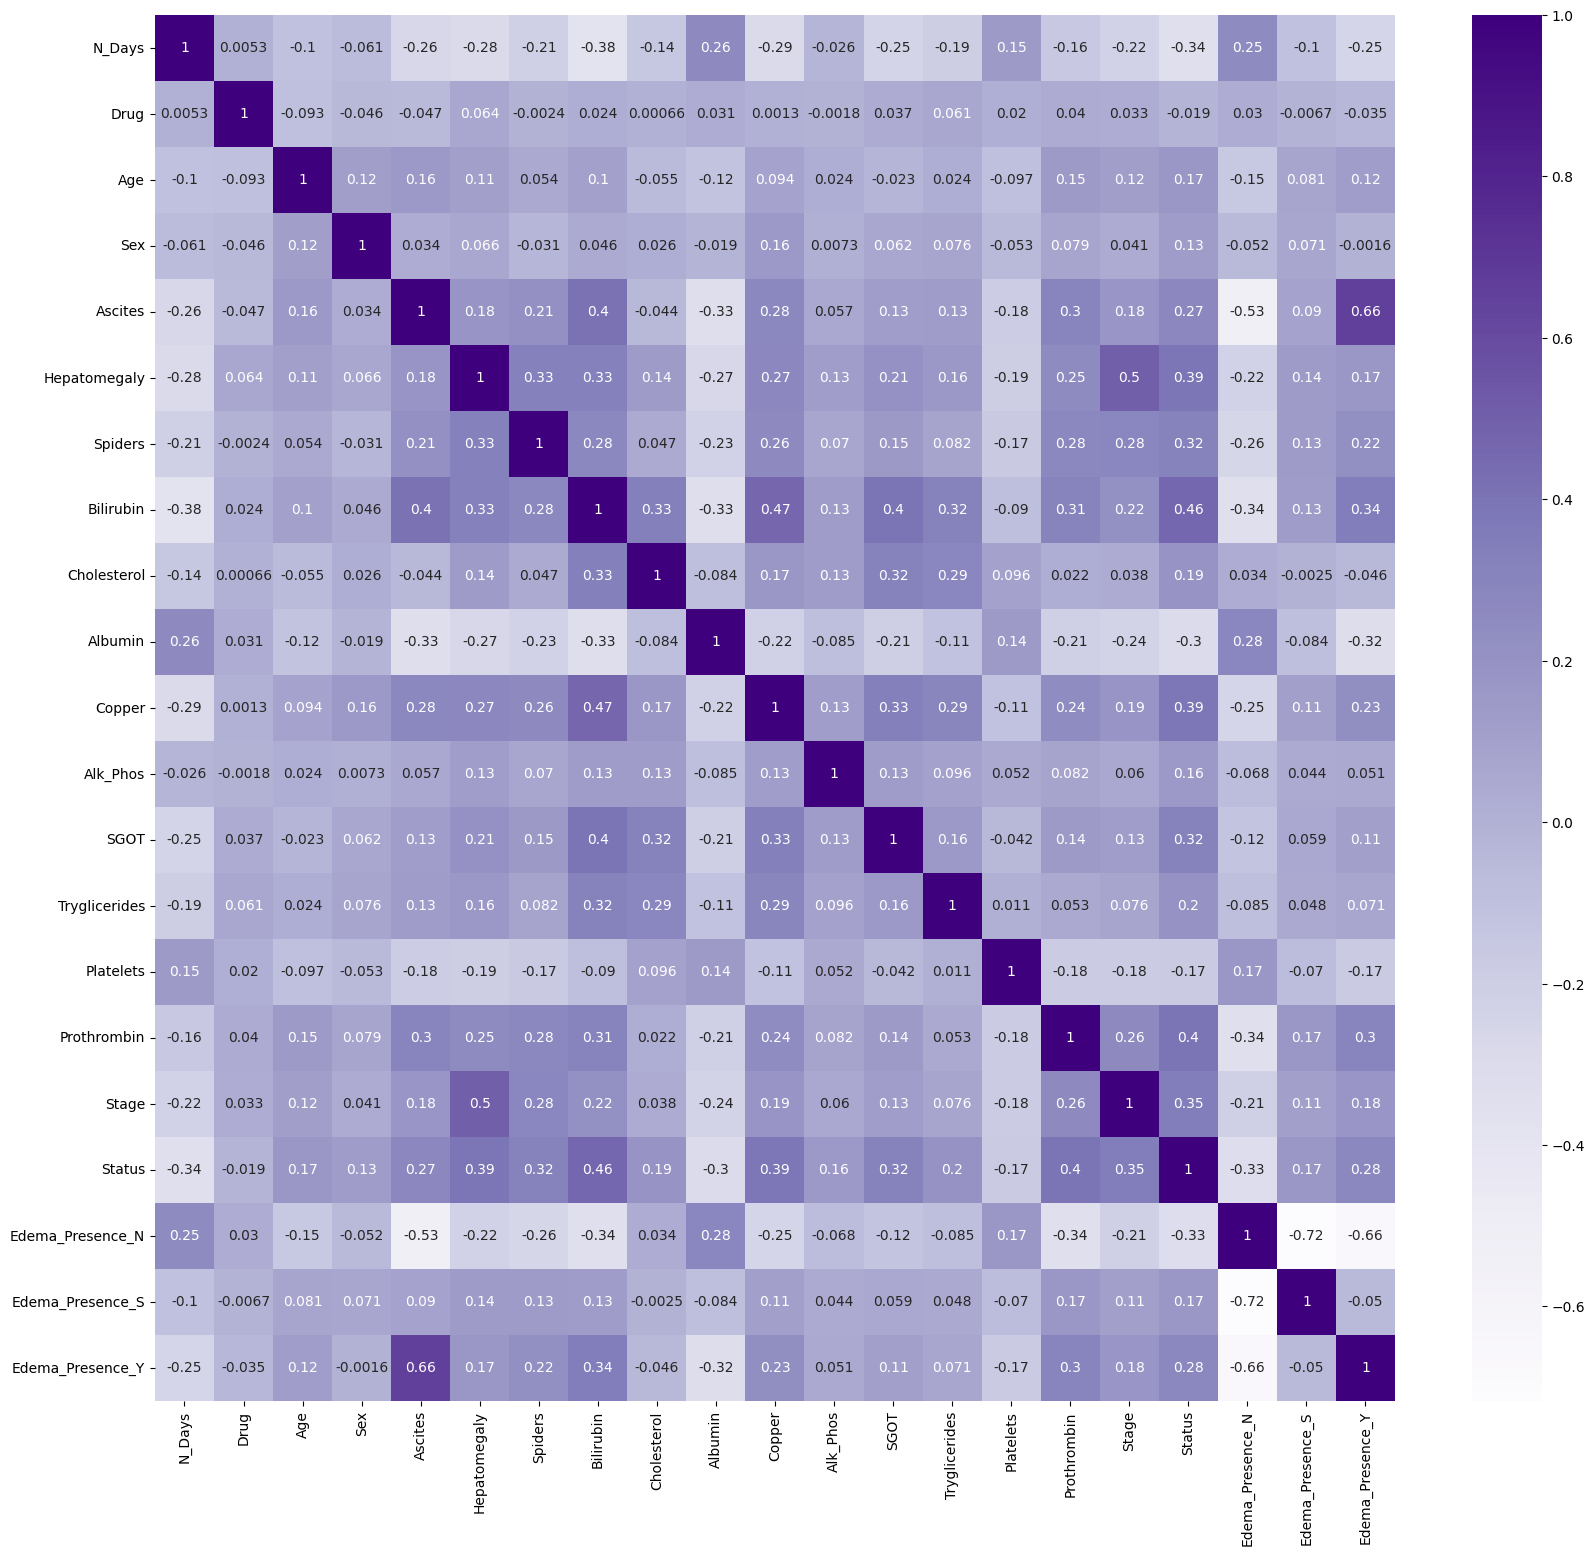

In [ ]:
plt.figure(figsize=(20,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Purples)
plt.show()

In [ ]:
cor_target = abs(cor["Status"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

N_Days              0.344967
Age                 0.170017
Sex                 0.133535
Ascites             0.274801
Hepatomegaly        0.392685
Spiders             0.321236
Bilirubin           0.463003
Cholesterol         0.189181
Albumin             0.295322
Copper              0.386971
Alk_Phos            0.159669
SGOT                0.322277
Tryglicerides       0.200757
Platelets           0.170280
Prothrombin         0.397509
Stage               0.345782
Status              1.000000
Edema_Presence_N    0.326014
Edema_Presence_S    0.172007
Edema_Presence_Y    0.281768
Name: Status, dtype: float64

In [ ]:
df.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status',
       'Edema_Presence_N', 'Edema_Presence_S', 'Edema_Presence_Y'],
      dtype='object')

In [ ]:
#df_afterfe=df[['N_Days', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
#       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
#       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status']]
df_afterfe=df

In [ ]:
X = df_afterfe.drop("Status", axis=1)
y = df_afterfe["Status"]
print(X.shape)
print(y.shape)

(8181, 20)
(8181,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("Training set size: {}".format(X_train.shape))
print("Testing set size: {}".format(X_test.shape))

Training set size: (6544, 20)
Testing set size: (1637, 20)


In [ ]:
y_test.value_counts()

0    1019
2     561
1      57
Name: Status, dtype: int64

In [ ]:
X_train

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_Presence_N,Edema_Presence_S,Edema_Presence_Y
7386,400,0,21464,1,1,1,1,3.4,260.0,3.65,290.0,1257.0,102.30,118.0,143.0,12.2,4.0,0,0,1
1461,1420,1,12035,0,0,0,0,0.6,314.0,3.85,48.0,7277.0,79.05,224.0,258.0,10.9,3.0,1,0,0
2895,1234,1,11058,0,0,1,0,7.3,1276.0,3.77,247.0,2424.0,198.40,140.0,330.0,10.8,2.0,1,0,0
3784,1657,0,19270,0,0,1,1,5.0,1600.0,3.21,75.0,2656.0,82.15,174.0,181.0,10.9,2.0,1,0,0
8141,1882,0,21828,0,0,1,0,1.6,442.0,2.95,105.0,820.0,85.25,108.0,181.0,10.1,3.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,1321,1,18302,0,0,0,0,0.8,257.0,3.89,9.0,637.0,97.65,146.0,295.0,10.6,1.0,1,0,0
1346,3422,0,23107,0,0,1,1,14.5,448.0,3.06,34.0,1218.0,60.45,318.0,385.0,11.4,4.0,1,0,0
3454,1615,1,19155,0,0,1,1,0.7,303.0,3.35,42.0,2132.0,79.05,91.0,251.0,11.7,4.0,1,0,0
7533,2468,1,17233,0,0,0,0,1.4,201.0,3.94,44.0,1345.0,54.25,145.0,445.0,11.2,3.0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()
X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.fit_transform(X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
X_train.sort_index()

# scaler = RobustScaler()
# X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.fit_transform(X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# X_train.sort_index()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_Presence_N,Edema_Presence_S,Edema_Presence_Y
0,0.201515,0,0.626391,1,0,0,0,0.139860,0.118429,0.518657,0.287671,0.096660,0.492379,0.075188,0.662675,0.137255,3.0,1,0,0
1,0.532814,1,0.505931,0,0,0,0,0.041958,0.147432,0.589552,0.101027,0.084798,0.348147,0.137845,0.596806,0.392157,3.0,1,0,0
2,0.712453,1,0.216723,0,0,1,1,0.209790,0.108157,0.593284,0.217466,0.054518,0.298412,0.042607,0.273453,0.529412,4.0,0,0,1
3,0.533235,1,0.465148,0,0,0,0,0.020979,0.082175,0.574627,0.092466,0.100491,0.144232,0.157895,0.413174,0.333333,3.0,1,0,0
5,0.139251,0,0.507663,0,0,1,0,0.020979,0.064653,0.559701,0.051370,0.454359,0.109995,0.087719,0.301397,0.490196,3.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211,0.233067,1,0.082354,0,0,0,0,0.034965,0.092447,0.597015,0.082192,0.073158,0.332585,0.065163,0.562874,0.294118,2.0,1,0,0
8212,0.233908,0,0.669169,0,0,1,0,0.006993,0.076133,0.604478,0.034247,0.037426,0.207444,0.200501,0.451098,0.274510,2.0,1,0,0
8213,0.200463,1,0.613899,0,0,0,0,0.006993,0.084592,0.294776,0.063356,0.064612,0.140061,0.122807,0.337325,0.352941,2.0,1,0,0
8215,0.167859,0,0.224701,0,0,0,0,0.118881,0.076737,0.447761,0.111301,0.056066,0.290871,0.137845,0.544910,0.294118,2.0,1,0,0


In [ ]:
print(y_train.value_counts())

0    4093
2    2215
1     236
Name: Status, dtype: int64


In [ ]:
X_train

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_Presence_N,Edema_Presence_S,Edema_Presence_Y
7386,0.075515,0,0.622822,1,1,1,1,0.216783,0.084592,0.630597,0.489726,0.071316,0.243703,0.213033,0.161677,0.627451,4.0,0,0,1
1461,0.290072,1,0.127913,0,0,0,0,0.020979,0.117221,0.705224,0.075342,0.514830,0.169100,0.478697,0.391218,0.372549,3.0,1,0,0
2895,0.250947,1,0.076632,0,0,1,0,0.489510,0.698489,0.675373,0.416096,0.157293,0.552062,0.268170,0.534930,0.352941,2.0,1,0,0
3784,0.339924,0,0.507663,0,0,1,1,0.328671,0.894260,0.466418,0.121575,0.174385,0.179047,0.353383,0.237525,0.372549,2.0,1,0,0
8141,0.387253,0,0.641927,0,0,1,0,0.090909,0.194562,0.369403,0.172945,0.039121,0.188994,0.187970,0.237525,0.215686,3.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,0.269247,1,0.456855,0,0,0,0,0.034965,0.082779,0.720149,0.008562,0.025638,0.228782,0.283208,0.465070,0.313725,1.0,1,0,0
1346,0.711191,0,0.709059,0,0,1,1,0.993007,0.198187,0.410448,0.051370,0.068443,0.109418,0.714286,0.644711,0.470588,4.0,1,0,0
3454,0.331090,1,0.501627,0,0,1,1,0.027972,0.110574,0.518657,0.065068,0.135780,0.169100,0.145363,0.377246,0.529412,4.0,1,0,0
7533,0.510517,1,0.400745,0,0,0,0,0.076923,0.048943,0.738806,0.068493,0.077799,0.089524,0.280702,0.764471,0.431373,3.0,1,0,0


In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state = 42)
X_train_ada, y_train_ada = ada.fit_resample(X_train,y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 60)
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [ ]:
from imblearn.combine import SMOTETomek
smtom = SMOTETomek(random_state = 50)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train,y_train)

In [ ]:
from imblearn.combine import SMOTEENN
smenn = SMOTEENN(random_state = 55)
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train,y_train)

In [ ]:
print(y_train_ada.value_counts())

0    4093
1    4056
2    3975
Name: Status, dtype: int64


In [ ]:
print(y_train_smtom.value_counts())

1    4086
2    3983
0    3978
Name: Status, dtype: int64


In [ ]:
print(y_train_smenn.value_counts())

1    4038
2    2686
0    2215
Name: Status, dtype: int64


In [ ]:
print(y_train_sm.value_counts())

2    4093
0    4093
1    4093
Name: Status, dtype: int64


In [ ]:
# X_train,y_train = X_train_ada, y_train_ada
# X_train,y_train = X_train_smtom, y_train_smtom
# X_train,y_train = X_train_smenn, y_train_smenn
X_train,y_train = X_train_sm, y_train_sm

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer

scoring_metric = make_scorer(log_loss, needs_proba=True, greater_is_better=False)

score_log = pd.DataFrame()
def score(model, name , x_test, y_test, position):
    y_pred = model.predict(x_test)
    pred = model.predict_proba(x_test)
    y_pred = y_pred.reshape(-1,)
    compare_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
    print("Confusion matrix: \n",confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(compare_results)
    score_log.loc[position, "Model"] = name
    score_log.loc[position, "Accuracy"] = round(accuracy_score(y_test, y_pred), 2)
    score_log.loc[position, "Precision"] = round(precision_score(y_test, y_pred, average='weighted'), 2)
    score_log.loc[position, "Recall"] = round(recall_score(y_test, y_pred, average='weighted'), 2)
    score_log.loc[position, "F1-Score"] = round(f1_score(y_test, y_pred, average='weighted'), 2)
    score_log.loc[position, "LogLoss"] = round(log_loss(y_test, pred), 5)
    return score_log

submission_labels = ["Status_C", "Status_CL", "Status_D"]
def submission_file(model):
  sub = pd.DataFrame()
  submission_predictions = model.predict_proba(df_test)
  # print(submission_predictions)
  sub = pd.DataFrame({"id": test_IDs, **dict(zip(submission_labels, submission_predictions.T))})
  return sub

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_neighbors = 5, p = 3, metric='minkowski',)
KNN_Classifier.fit(X_train, y_train)
print(score(KNN_Classifier,"KNN Classifier", X_test, y_test, 1))

Confusion matrix: 
 [[692 139 188]
 [ 20  21  16]
 [112  79 370]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75      1019
           1       0.09      0.37      0.14        57
           2       0.64      0.66      0.65       561

    accuracy                           0.66      1637
   macro avg       0.52      0.57      0.51      1637
weighted avg       0.75      0.66      0.70      1637

      Actual  Predicted
3662       2          2
8168       1          2
3927       0          0
7071       0          1
1929       0          1
...      ...        ...
498        0          0
2607       0          0
2479       2          2
1316       2          1
822        0          2

[1637 rows x 2 columns]
            Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1  KNN Classifier      0.66       0.75    0.66       0.7  5.31223


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
print(score(model,"Gaussian Naive Bayes", X_test, y_test, 2))

Confusion matrix: 
 [[834 123  62]
 [ 25  26   6]
 [146 158 257]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1019
           1       0.08      0.46      0.14        57
           2       0.79      0.46      0.58       561

    accuracy                           0.68      1637
   macro avg       0.57      0.58      0.52      1637
weighted avg       0.79      0.68      0.72      1637

      Actual  Predicted
3662       2          2
8168       1          1
3927       0          0
7071       0          1
1929       0          0
...      ...        ...
498        0          0
2607       0          2
2479       2          2
1316       2          1
822        0          1

[1637 rows x 2 columns]
                  Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1        KNN Classifier      0.66       0.75    0.66      0.70  5.31223
2  Gaussian Naive Bayes      0.68       0.79    0.68      0.72  2.43949


In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_bernoulli=BernoulliNB()
model_bernoulli.fit(X_train,y_train)
print(score(model_bernoulli,"Bernoulli Naive Bayes", X_test, y_test, 3))

Confusion matrix: 
 [[616 301 102]
 [ 22  28   7]
 [ 81 222 258]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71      1019
           1       0.05      0.49      0.09        57
           2       0.70      0.46      0.56       561

    accuracy                           0.55      1637
   macro avg       0.54      0.52      0.45      1637
weighted avg       0.78      0.55      0.64      1637

      Actual  Predicted
3662       2          2
8168       1          2
3927       0          0
7071       0          1
1929       0          0
...      ...        ...
498        0          0
2607       0          2
2479       2          2
1316       2          2
822        0          2

[1637 rows x 2 columns]
                   Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1         KNN Classifier      0.66       0.75    0.66      0.70  5.31223
2   Gaussian Naive Bayes      0.68       0.79    0.68      0.72  2.43949
3  Bernoulli Naive Ba

In [ ]:
from sklearn.svm import SVC
model=SVC(probability = True)
model.fit(X_train,y_train)
print(score(model,"SVC", X_test, y_test, 4))

Confusion matrix: 
 [[758 140 121]
 [ 19  30   8]
 [ 90  85 386]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1019
           1       0.12      0.53      0.19        57
           2       0.75      0.69      0.72       561

    accuracy                           0.72      1637
   macro avg       0.58      0.65      0.57      1637
weighted avg       0.81      0.72      0.75      1637

      Actual  Predicted
3662       2          2
8168       1          1
3927       0          0
7071       0          1
1929       0          2
...      ...        ...
498        0          0
2607       0          0
2479       2          2
1316       2          2
822        0          2

[1637 rows x 2 columns]
                   Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1         KNN Classifier      0.66       0.75    0.66      0.70  5.31223
2   Gaussian Naive Bayes      0.68       0.79    0.68      0.72  2.43949
3  Bernoulli Naive Ba

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {'kernel':('linear','poly','rbf'), 'C':[1, 10]}
svc = svm.SVC(probability = True)
svc_grid_cv = GridSearchCV(svc,parameters,scoring = scoring_metric)
svc_grid_cv.fit(X_train,y_train)
print(score(svc_grid_cv,"Grid Search SVC", X_test, y_test, 5))

Confusion matrix: 
 [[791 114 114]
 [ 18  28  11]
 [ 92  74 395]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1019
           1       0.13      0.49      0.21        57
           2       0.76      0.70      0.73       561

    accuracy                           0.74      1637
   macro avg       0.59      0.66      0.59      1637
weighted avg       0.81      0.74      0.77      1637

      Actual  Predicted
3662       2          2
8168       1          1
3927       0          0
7071       0          1
1929       0          1
...      ...        ...
498        0          0
2607       0          0
2479       2          0
1316       2          2
822        0          2

[1637 rows x 2 columns]
                   Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1         KNN Classifier      0.66       0.75    0.66      0.70  5.31223
2   Gaussian Naive Bayes      0.68       0.79    0.68      0.72  2.43949
3  Bernoulli Naive Ba

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
print(score(classifier,"Random Forest Classifier", X_test, y_test, 6))

Confusion matrix: 
 [[884  31 104]
 [ 22  20  15]
 [123  28 410]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1019
           1       0.25      0.35      0.29        57
           2       0.78      0.73      0.75       561

    accuracy                           0.80      1637
   macro avg       0.63      0.65      0.64      1637
weighted avg       0.81      0.80      0.81      1637

      Actual  Predicted
3662       2          2
8168       1          2
3927       0          0
7071       0          0
1929       0          2
...      ...        ...
498        0          0
2607       0          0
2479       2          0
1316       2          2
822        0          2

[1637 rows x 2 columns]
                      Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1            KNN Classifier      0.66       0.75    0.66      0.70  5.31223
2      Gaussian Naive Bayes      0.68       0.79    0.68      0.72  2.43949
3     Bernou

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
print(score(logmodel,"Logistic Regression", X_test, y_test, 7))

Confusion matrix: 
 [[740 166 113]
 [ 18  29  10]
 [ 91  94 376]]
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1019
           1       0.10      0.51      0.17        57
           2       0.75      0.67      0.71       561

    accuracy                           0.70      1637
   macro avg       0.58      0.64      0.56      1637
weighted avg       0.80      0.70      0.74      1637

      Actual  Predicted
3662       2          2
8168       1          1
3927       0          0
7071       0          0
1929       0          2
...      ...        ...
498        0          0
2607       0          2
2479       2          2
1316       2          0
822        0          2

[1637 rows x 2 columns]
                      Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1            KNN Classifier      0.66       0.75    0.66      0.70  5.31223
2      Gaussian Naive Bayes      0.68       0.79    0.68      0.72  2.43949
3     Bernou

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
parameters = {'max_features':(["sqrt"]), 'criterion':("gini", "entropy", "log_loss"),  'max_depth':[10, 30, 40, 50, 70, 100, 150], }
rfc = RandomForestClassifier(random_state = 0)
rf_grid_cv = GridSearchCV(rfc,parameters,scoring = scoring_metric)
rf_grid_cv.fit(X_train,y_train)
print(rf_grid_cv.best_params_)
print(score(rf_grid_cv,"Grid Search Random Forest Classfier", X_test, y_test, 8))

{'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt'}
Confusion matrix: 
 [[885  28 106]
 [ 22  21  14]
 [117  22 422]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1019
           1       0.30      0.37      0.33        57
           2       0.78      0.75      0.77       561

    accuracy                           0.81      1637
   macro avg       0.65      0.66      0.65      1637
weighted avg       0.82      0.81      0.81      1637

      Actual  Predicted
3662       2          2
8168       1          2
3927       0          0
7071       0          0
1929       0          0
...      ...        ...
498        0          0
2607       0          0
2479       2          0
1316       2          2
822        0          2

[1637 rows x 2 columns]
                                 Model  Accuracy  Precision  Recall  F1-Score  \
1                       KNN Classifier      0.66       0.75    0.66      0.70   
2           

Confusion matrix: 
 [[906  10 103]
 [ 24  18  15]
 [111  16 434]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1019
           1       0.41      0.32      0.36        57
           2       0.79      0.77      0.78       561

    accuracy                           0.83      1637
   macro avg       0.69      0.66      0.67      1637
weighted avg       0.83      0.83      0.83      1637

      Actual  Predicted
3662       2          2
8168       1          2
3927       0          0
7071       0          0
1929       0          0
...      ...        ...
498        0          0
2607       0          0
2479       2          0
1316       2          2
822        0          2

[1637 rows x 2 columns]
                                         Model  Accuracy  Precision  Recall  \
1                               KNN Classifier      0.66       0.75    0.66   
2                         Gaussian Naive Bayes      0.68       0.79    0.68   
3  

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

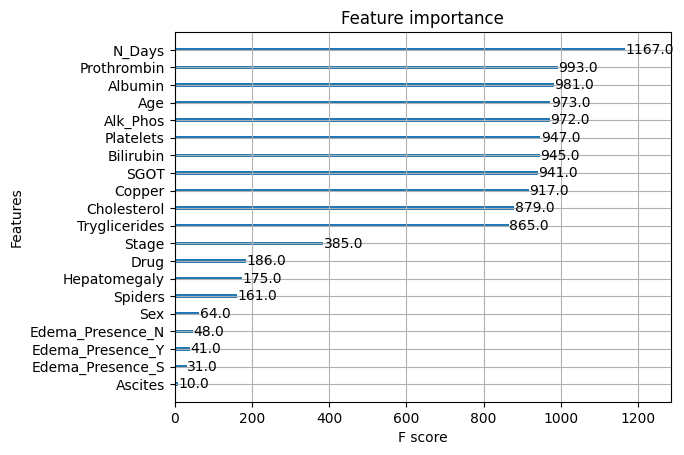

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(score(xgb,"XGBoost Classfier", X_test, y_test, 9))
from xgboost import plot_importance
plot_importance(xgb)

In [ ]:
parameters = {'n_estimators': [2,4,6,8,10], 'max_depth':[3,4,5,6,7,8,9,10], 'min_child_weight':[3,4,5,6,7,8,9,10]}
xgb = XGBClassifier()
xgb_grid_cv = GridSearchCV(xgb,parameters,scoring = scoring_metric)
xgb_grid_cv.fit(X_train,y_train)
print(xgb_grid_cv.best_params_)
print(score(xgb_grid_cv,"Grid Search XGBoost Classfier", X_test, y_test, 10))

{'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 10}
Confusion matrix: 
 [[855  48 116]
 [ 24  25   8]
 [106  33 422]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1019
           1       0.24      0.44      0.31        57
           2       0.77      0.75      0.76       561

    accuracy                           0.80      1637
   macro avg       0.63      0.68      0.64      1637
weighted avg       0.81      0.80      0.80      1637

      Actual  Predicted
3662       2          2
8168       1          2
3927       0          0
7071       0          0
1929       0          2
...      ...        ...
498        0          0
2607       0          0
2479       2          0
1316       2          2
822        0          0

[1637 rows x 2 columns]
                                  Model  Accuracy  Precision  Recall  \
1                        KNN Classifier      0.66       0.75    0.66   
2                  Gaussian Naive B

In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100,
                                    depth=6,
                                    learning_rate=0.5,
                                    loss_function='MultiClass',
                                    random_state=42,
                                    verbose=100)
catboost_model.fit(X_train,y_train)
print(score(catboost_model,"Catboost Classfier", X_test, y_test, 11))

0:	learn: 0.8590192	total: 66.3ms	remaining: 6.57s
99:	learn: 0.2401635	total: 1.55s	remaining: 0us
Confusion matrix: 
 [[871  32 116]
 [ 24  23  10]
 [109  33 419]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1019
           1       0.26      0.40      0.32        57
           2       0.77      0.75      0.76       561

    accuracy                           0.80      1637
   macro avg       0.63      0.67      0.65      1637
weighted avg       0.81      0.80      0.81      1637

      Actual  Predicted
3662       2          2
8168       1          2
3927       0          0
7071       0          1
1929       0          0
...      ...        ...
498        0          0
2607       0          0
2479       2          0
1316       2          2
822        0          2

[1637 rows x 2 columns]
                                  Model  Accuracy  Precision  Recall  \
1                        KNN Classifier      0.66       0.75    0.66

In [ ]:
catboost_model_default = CatBoostClassifier()
catboost_model_default.fit(X_train,y_train)
print(score(catboost_model_default,"Catboost Classfier Default", X_test, y_test, 12))

Learning rate set to 0.089923
0:	learn: 1.0428561	total: 16.3ms	remaining: 16.3s
1:	learn: 0.9986168	total: 31.8ms	remaining: 15.9s
2:	learn: 0.9624777	total: 47ms	remaining: 15.6s
3:	learn: 0.9303720	total: 61.6ms	remaining: 15.3s
4:	learn: 0.9024394	total: 76.6ms	remaining: 15.3s
5:	learn: 0.8786130	total: 95.2ms	remaining: 15.8s
6:	learn: 0.8570541	total: 114ms	remaining: 16.1s
7:	learn: 0.8393568	total: 130ms	remaining: 16.1s
8:	learn: 0.8212768	total: 146ms	remaining: 16.1s
9:	learn: 0.8054247	total: 161ms	remaining: 15.9s
10:	learn: 0.7919007	total: 176ms	remaining: 15.8s
11:	learn: 0.7794016	total: 191ms	remaining: 15.7s
12:	learn: 0.7682892	total: 212ms	remaining: 16.1s
13:	learn: 0.7570786	total: 227ms	remaining: 16s
14:	learn: 0.7480012	total: 241ms	remaining: 15.8s
15:	learn: 0.7371642	total: 256ms	remaining: 15.8s
16:	learn: 0.7288330	total: 272ms	remaining: 15.7s
17:	learn: 0.7213418	total: 286ms	remaining: 15.6s
18:	learn: 0.7142171	total: 300ms	remaining: 15.5s
19:	learn

In [ ]:
parameters = {'max_depth': [4],'iterations':[100,150,200], 'learning_rate' :[0.6,0.65,0.7]}
catboost = CatBoostClassifier(loss_function='MultiClass',
                                    random_state=42,
                                    verbose=100)
catboost_grid_cv = GridSearchCV(catboost,parameters,scoring = scoring_metric)
catboost_grid_cv.fit(X_train,y_train)
print(catboost_grid_cv.best_params_)
print(score(catboost_grid_cv,"Grid Search Catboost Classfier", X_test, y_test, 13))

0:	learn: 0.8676222	total: 7.4ms	remaining: 732ms
99:	learn: 0.3137665	total: 691ms	remaining: 0us
0:	learn: 0.8645761	total: 7.11ms	remaining: 704ms
99:	learn: 0.3247915	total: 685ms	remaining: 0us
0:	learn: 0.8612749	total: 6.92ms	remaining: 685ms
99:	learn: 0.3312206	total: 667ms	remaining: 0us
0:	learn: 0.8618762	total: 6.74ms	remaining: 668ms
99:	learn: 0.3423318	total: 811ms	remaining: 0us
0:	learn: 0.8499715	total: 11ms	remaining: 1.09s
99:	learn: 0.3399939	total: 1.47s	remaining: 0us
0:	learn: 0.8578398	total: 16.6ms	remaining: 1.64s
99:	learn: 0.3041749	total: 1.39s	remaining: 0us
0:	learn: 0.8547408	total: 12ms	remaining: 1.19s
99:	learn: 0.3166158	total: 760ms	remaining: 0us
0:	learn: 0.8512646	total: 6.79ms	remaining: 673ms
99:	learn: 0.3258393	total: 668ms	remaining: 0us
0:	learn: 0.8518812	total: 6.65ms	remaining: 658ms
99:	learn: 0.3371471	total: 654ms	remaining: 0us
0:	learn: 0.8395043	total: 7.25ms	remaining: 718ms
99:	learn: 0.3247339	total: 696ms	remaining: 0us
0:	le

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(20),verbose=10,
                    learning_rate_init=0.5, max_iter=5000,
                    activation='logistic', solver='sgd', shuffle=True, random_state=30)

mlpc.fit(X_train,y_train)
print(score(mlpc,"Multilayer Perceptron Classfier", X_test, y_test, 14))

Iteration 1, loss = 0.97143219
Iteration 2, loss = 0.83695900
Iteration 3, loss = 0.79337184
Iteration 4, loss = 0.77050608
Iteration 5, loss = 0.75332344
Iteration 6, loss = 0.75182564
Iteration 7, loss = 0.73246279
Iteration 8, loss = 0.72368597
Iteration 9, loss = 0.71666200
Iteration 10, loss = 0.71391792
Iteration 11, loss = 0.70704003
Iteration 12, loss = 0.69975348
Iteration 13, loss = 0.69772139
Iteration 14, loss = 0.69083562
Iteration 15, loss = 0.68618645
Iteration 16, loss = 0.67874743
Iteration 17, loss = 0.67694126
Iteration 18, loss = 0.68063332
Iteration 19, loss = 0.67072572
Iteration 20, loss = 0.66025833
Iteration 21, loss = 0.66298506
Iteration 22, loss = 0.65404319
Iteration 23, loss = 0.65134158
Iteration 24, loss = 0.65029557
Iteration 25, loss = 0.64895502
Iteration 26, loss = 0.64317523
Iteration 27, loss = 0.64386468
Iteration 28, loss = 0.63717807
Iteration 29, loss = 0.63522382
Iteration 30, loss = 0.63413335
Iteration 31, loss = 0.62826334
Iteration 32, los

In [ ]:
score_log

,Model,Accuracy,Precision,Recall,F1-Score,LogLoss
1,KNN Classifier,0.66,0.75,0.66,0.70,5.31223
2,Gaussian Naive Bayes,0.68,0.79,0.68,0.72,2.43949
3,Bernoulli Naive Bayes,0.55,0.78,0.55,0.64,0.94132
4,SVC,0.72,0.81,0.72,0.75,0.70468
5,Grid Search SVC,0.74,0.81,0.74,0.77,0.66079
6,Random Forest Classifier,0.80,0.81,0.80,0.81,0.74812
7,Logistic Regression,0.70,0.80,0.70,0.74,0.76552
8,Grid Search Random Forest Classfier,0.81,0.82,0.81,0.81,0.52149
9,XGBoost Classfier,0.83,0.83,0.83,0.83,0.49882
10,Grid Search XGBoost Classfier,0.80,0.81,0.80,0.80,0.54072


In [ ]:
# rf_grid_cv_sub_df = submission_file(rf_grid_cv) #grid search RF
# catboost_model_default_sub_df = submission_file(catboost_model_default) #Catboost with default parameter
# catboost_model_sub_df = submission_file(catboost_model) #Catboost regular - best submission so far
# catboost_grid_cv_sub_df = submission_file(catboost_grid_cv) #grid search Catboost
# xgb_grid_cv_sub_df = submission_file(xgb_grid_cv) #grid search XGBoost
# mlpc_sub_df = submission_file(mlpc) #Multilayer Perceptron

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
              #  ('rfgc',rf_grid_cv)
              ('cbdm',catboost_model_default)
              # ,('xggc',xgb_grid_cv)
              ,('xg',xgb)
              # ,('svcgc',svc_grid_cv)
              # ,('rf',classifier)
              ]
stacked_classifier = StackingClassifier(estimators=estimators, final_estimator=mlpc)
stacked_classifier.fit(X_train,y_train)
print(score(stacked_classifier,"Stacked Classfier with RF/XGBoost/Catboost", X_test, y_test, 15))

Streaming output truncated to the last 5000 lines.
130:	learn: 0.4550298	total: 2.98s	remaining: 19.8s
131:	learn: 0.4539795	total: 3.01s	remaining: 19.8s
132:	learn: 0.4519509	total: 3.04s	remaining: 19.8s
133:	learn: 0.4512985	total: 3.06s	remaining: 19.8s
134:	learn: 0.4500095	total: 3.09s	remaining: 19.8s
135:	learn: 0.4490799	total: 3.12s	remaining: 19.8s
136:	learn: 0.4477660	total: 3.15s	remaining: 19.8s
137:	learn: 0.4468529	total: 3.18s	remaining: 19.9s
138:	learn: 0.4453229	total: 3.2s	remaining: 19.8s
139:	learn: 0.4445702	total: 3.23s	remaining: 19.9s
140:	learn: 0.4432649	total: 3.26s	remaining: 19.9s
141:	learn: 0.4417404	total: 3.29s	remaining: 19.8s
142:	learn: 0.4411272	total: 3.31s	remaining: 19.8s
143:	learn: 0.4403215	total: 3.34s	remaining: 19.8s
144:	learn: 0.4390300	total: 3.37s	remaining: 19.9s
145:	learn: 0.4380427	total: 3.39s	remaining: 19.8s
146:	learn: 0.4367468	total: 3.42s	remaining: 19.8s
147:	learn: 0.4352666	total: 3.45s	remaining: 19.8s
148:	learn: 0.

In [ ]:
submission_file(xgb).to_csv('submission.csv', index=False)